In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
data=pd.read_csv("person1-step-data.csv")

In [3]:
data.head(5)

,Source,Date,Hour,Count
0,Person1 iPhone SE,2014-12-07,8,13
1,Person1 iPhone SE,2014-12-07,8,13
2,Person1 iPhone SE,2014-12-07,8,1
3,Person1 iPhone SE,2014-12-07,8,9
4,Person1 iPhone SE,2014-12-07,8,15


firstly I checked the first five rows of the dataset and we can notice that here are basically 4 columns in total. Source (the device that our participants use), data (the date of a walk), hour (the time of a walk), and count (total step of a walk)

In [4]:
data['Hour'].describe().round(2)

count    183787.00
mean         12.71
std           4.88
min           0.00
25%           9.00
50%          12.00
75%          16.00
max          23.00
Name: Hour, dtype: float64

In [5]:
data['Count'].describe().round(2)

count    183787.00
mean         79.79
std         358.10
min           1.00
25%           6.00
50%          17.00
75%          35.00
max       88359.00
Name: Count, dtype: float64

Then I briefly investigated the details of the two data hour and count, I come out with their mean, std, min, max and 25%, 50% and 75% data. it offered me a deeper understanding of these two columns data.

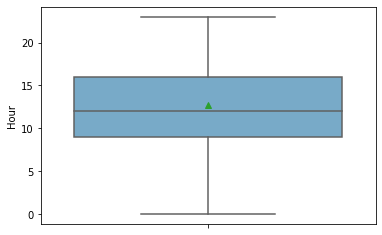

In [6]:
ax = sns.boxplot(y='Hour', data=data, palette='Blues', showmeans=True)

In [20]:
data['Hour'] = data['Hour'].astype(object)
data_day= data.groupby('Date').agg('sum')
data_day

,Count
Date,
2014-12-07,2693
2014-12-08,6567
2014-12-09,6879
2014-12-10,7845
2014-12-11,916
...,...
2021-09-18,11572
2021-09-19,10789
2021-09-20,8800


<AxesSubplot:xlabel='Date'>

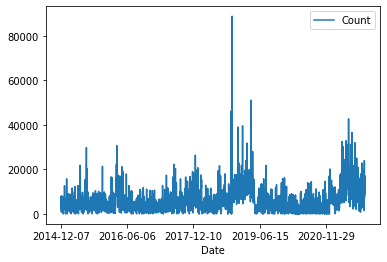

In [21]:
data_day.plot()

with the help of groupby function, I got the sum of steps on every single data and visulized it in a time series plot.

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [57]:
Q1 = data_day['Count'].quantile(0.25)
Q3 = data_day['Count'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6174.5


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [58]:
try:
    
    
    print(data_day['Count'] < (Q1 - 1.5 * IQR)) |(data_day['Count'] > (Q3 + 1.5 * IQR))
except:
    pass
#a type error occurs here, thats y I used try and catch

Date
2014-12-07    False
2014-12-08    False
2014-12-09    False
2014-12-10    False
2014-12-11    False
              ...  
2021-09-18    False
2021-09-19    False
2021-09-20    False
2021-09-21    False
2021-09-22    False
Name: Count, Length: 2295, dtype: bool


In [64]:
data_day_cleaned_raw = data_day['Count'][~((data_day['Count'] < (Q1 - 1.5 * IQR)) |(data_day['Count']> (Q3 + 1.5 * IQR)))]
data_day_cleaned_raw.shape


(2189,)

we can IQR score to filter out the outliers by keeping only valid values. as we can see here, only 2189 of 2295 columns are remained while the rest has been romoved as outliers.

In [56]:
data_day.shape

(2295, 1)

In [61]:
data_day.head(5)

,Count
Date,
2014-12-07,2693
2014-12-08,6567
2014-12-09,6879
2014-12-10,7845
2014-12-11,916


In [69]:
df1 = pd.DataFrame(data=data_day_cleaned_raw.index, columns=['Date'])
df2 = pd.DataFrame(data=data_day_cleaned_raw.values, columns=['Count'])
data_day_cleaned = pd.merge(df1, df2, left_index=True, right_index=True)
data_day_cleaned.head(5)

,Date,Count
0,2014-12-07,2693
1,2014-12-08,6567
2,2014-12-09,6879
3,2014-12-10,7845
4,2014-12-11,916


due to the fact that the data type of data_day_raw is pandas series instead of pandas dataframe, so I converted it into pandas dataframe

In [73]:
data_day_cleaned['Date'] = pd.to_datetime(data_day_cleaned['Date'])
data_year = data_day_cleaned.groupby(data_day_cleaned.Date.dt.year).sum()
data_year

,Count
Date,
2014,111590
2015,1469951
2016,1630999
2017,1598809
2018,1891654
2019,2135160
2020,1219518
2021,2072833


I came out with the sum of steps for every year with the help of groupby function and then plot it in the coming two plots.

<ipython-input-74-971589243cba>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


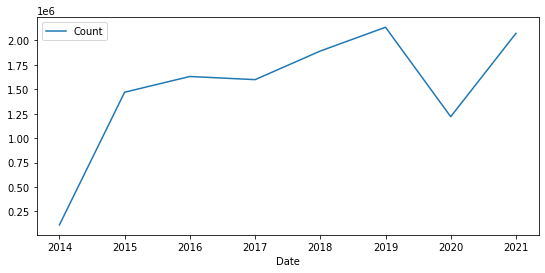

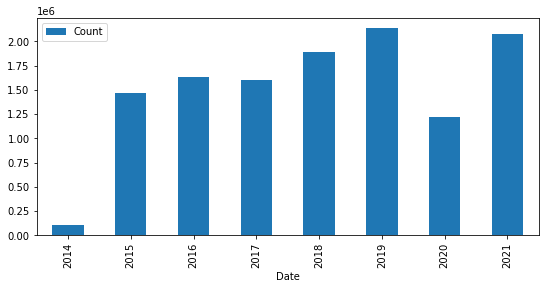

In [74]:
fig, ax = plt.subplots(figsize = (9,4))
data_year.plot(y='Count', ax=ax)
data_year.plot.bar(y="Count", figsize = (9,4))
fig.show()

as we can see in the plots, due to the fact that there is only one montes data in 2014, so year 2014 can be regarded as a outlier, so I will drop it then. and then we can also notice that from year 2015 to 2019, the steps number increases gradually but it droped significantly in the year 2020 but still increased in 2021.

In [81]:
data_2015 = data_day_cleaned['Date'].dt.year == int(2015)
data_2015 = data_day_cleaned[data_2015]
data_2015
data_2015 = data_2015.groupby(data_2015.Date.dt.month).sum()
data_2015

,Count
Date,
1,131321
2,106851
3,101621
4,91726
5,136431
6,169385
7,152442
8,138543
9,118508


I then get the every single months exact number of step in the year of 2015. then with the help of a while loop, I got the every single months exact number of step for the year from 2015 to 2021

In [95]:
t=True
year_index=2015
year_list=[]
while t:
    temp=data_day_cleaned['Date'].dt.year == int(year_index)
    temp=data_day_cleaned[temp]
    temp = temp.groupby(temp.Date.dt.month).sum()
    year_list.append(temp)
    year_index+=1
    if year_index==2022:
        t=False
        

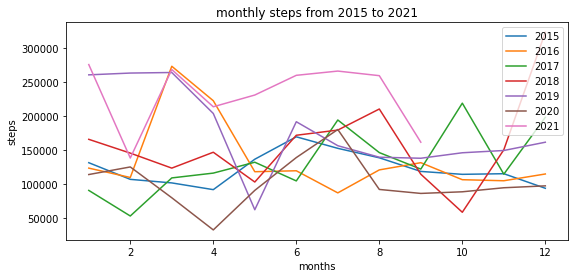

In [102]:
fig, ax = plt.subplots(figsize = (9,4))
l_2015=plt.plot(year_list[0],label='2015')
l_2016=plt.plot(year_list[1],label='2016')
l_2017=plt.plot(year_list[2],label='2017')
l_2018=plt.plot(year_list[3],label='2018')
l_2019=plt.plot(year_list[4],label='2019')
l_2020=plt.plot(year_list[5],label='2020')
l_2021=plt.plot(year_list[6],label='2021')
plt.title('monthly steps from 2015 to 2021')
plt.xlabel('months')
plt.ylabel('steps')
plt.legend()
plt.show()

In [106]:
from scipy.stats import median_test
median_test(year_list[0]['Count'],year_list[1]['Count'],year_list[2]['Count'],year_list[3]['Count'],year_list[4]['Count'],year_list[5]['Count'],year_list[6]['Count'], ties = "above")

(30.992378048780495,
 2.54343642121795e-05,
 132040.0,
 array([[ 4,  2,  5,  8, 11,  2,  9],
        [ 8, 10,  7,  4,  1, 10,  0]]))

H_0: year2015 = year2016=.... = year2021


H_1: year2015 < year2016<... < year2021

I choose α=0.05 as standard. as we can see here p=2.54343642121795e-05<0.05

 this is less than 0.05 so we reject the null hypothesis. We conclude that the ...
 
 
our assumptions here are:

- the six groups are independent of each other (they cannot influence each other)
- each cell in the contingency table has expected value at least 5 (it is satisfied since there are 12 elements each)
- data are i.i.d (we assume this is true even though we can't really know for sure.)
- data are at least on the ordinal scale